<a href="https://colab.research.google.com/github/danlee0448/MSDS422/blob/main/MSDS422_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### PRACTICAL MACHINE LEARNING
#### Assignment 1: Exploring and Visualizing Data
Authors : Chris Fiore, Shree Bharadwaj <br>
Reference : https://github.com/djp840/MSDS_422_Public 

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Background Materials
COVID 19 is an ongoing threat.  Data for the outbreak are available here:  
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide 

Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  
reference:  https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py 

Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.)

Management Questions
What are the management and analytical questions associated with this problem?

Python Programming
All programming will be done in Python.

-- Grading Guidelines (50 points)
1) Data preparation (10 points)
2) Data exploration (10 points)
3) Data visualization (10 points)
4) Data scaling and comparisons (10 points)
5) Insights from analysis (10 points)

Deliverables and File Formats
you can use this notebook to update comments or Provide a double-spaced paper with a two-page maximum for the text. The paper should include all a discussion of all graded elements but focus particularly on insights. Include your Python code and output as an appendix.  Upload this as a single .pdf file.

Formatting Python Code
Refer to Google’s Python Style Guide (Links to an external site.) for ideas about formatting Python code:

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

### Data Dictionary COVID-19 

The MSDS422_COVID19 data frame has 32771 rows and 10 columns.<br>
This data frame contains the following columns:<br>
<b>Date</b><br>
Formatted  datetime64[ns]<br>
<b>Day</b><br>
Calendar day, dtype int64<br>
<b>Month</b><br>
Calendar month, dtype int64<br>
<b>Year</b><br>
Calendar year, dtype int64<br>
<b>Cases</b><br>
Number of Cases Per Day, dtype int64<br>
<b>Deaths</b><br>
Number of Deaths, dtype int64<br>
<b>Country </b><br>
Country Name, dtype object<br>
<b>Population</b><br>
Country Population<br>
<b>Continent</b><br>
Continent continuous expanses of land (Africa, Antarctica, Asia, Australia, Europe, North America, South America)<br>
<b>CumulativeNumberPer100KCases </b><br>
Cumulative Number For 14 Days of COVID-19 Cases per 100000<br>
<b>Sources:</b><br>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
pip install --upgrade pip

In [3]:
!pip install prettytable
!pip install geopandas

In [4]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
import geopandas as gpd
from prettytable import PrettyTable
import seaborn as sns
import sklearn
import math
from datetime import datetime

In [5]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

##### Load Data (for Colab/Google Drive)
##### S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

In [6]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/Colab_Notebooks/NU/MSDS422/Module_1/
!pwd
!ls
print('Working Directory')
print(os.getcwd())

/content/gdrive/My Drive/Colab_Notebooks/NU/MSDS422/Module_1
/content/gdrive/My Drive/Colab_Notebooks/NU/MSDS422/Module_1
MSDS422_Assignment1.ipynb  updated_data.csv
Working Directory
/content/gdrive/My Drive/Colab_Notebooks/NU/MSDS422/Module_1


In [8]:
##### Load Data 
work_dir = "/content/gdrive/My Drive/Colab_Notebooks/NU/MSDS422/Module_1/"
covid19_dfA=pd.read_csv('./updated_data.csv')

In [9]:
# Check few columns to make sure the data is loaded properly
covid19_dfA.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


#### Common functions/libraries

In [10]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')
    plt.show()
    plt.close()

np.set_printoptions(precision=3)

In [11]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'

init_plotting()

# avoid empty plot, always good to close plot
plt.close()

#### Exploratory Data Analysis (EDA) 

In [12]:
# Get an understanding of the data
print("Shape:", covid19_dfA.shape,"\n")
print("Variable Types:") 
print(covid19_dfA.dtypes)

covid19_dfA.head(15)

Shape: (61900, 12) 

Variable Types:
dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,05/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [13]:
### examine the structure of the DataFrame object###
print('\nContents of covid19 data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Cases =', len(covid19_dfA), '\n') 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
covid19_dfA.columns

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(covid19_dfA))


Contents of covid19 data ---------------

Number of Cases = 61900 

      dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0  14/12/2020  ...                                           9.013779         
1  13/12/2020  ...                                           7.052776         
2  12/12/2020  ...                                           6.868768         
3  11/12/2020  ...                                           7.134266         
4  10/12/2020  ...                                           6.968658         

[5 rows x 12 columns]


In [14]:
# Number of countries
len(covid19_dfA.countriesAndTerritories.unique())

214

In [15]:
# Count of geoId, this should hopefully match the count of countries. 
len(covid19_dfA.geoId.unique())

214

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row will indicate if column has missing records
</div> 

In [16]:
# summary statistics
covid19_dfA.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


### Review Dataset for Missing Values

<div class="alert alert-block alert-warning">
Review dataset for missing records
</div>

In [17]:
covid19_dfA.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

## Preprocess Data for Analysis

#### Date Column formatted into ISO 8601 standard format (Year - Month - Day)

In [18]:
covid19_dfA['dateRep']=pd.to_datetime(covid19_dfA['dateRep'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
covid19_dfA['dateRep']=pd.to_datetime(covid19_dfA['dateRep'], format='%Y/%m/%d')
covid19_dfA['dateRep'].head()

0   2020-12-14
1   2020-12-13
2   2020-12-12
3   2020-12-11
4   2020-12-10
Name: dateRep, dtype: datetime64[ns]

#### Review Data Types (dtypes)

In [19]:
covid19_dfA.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [20]:
covid19_dfA.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [21]:
covid19_dfA.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [22]:
covid19_dfA.shape

(61900, 12)

In [23]:
covid19_dfA.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [94]:
covid19_dfA = covid19_dfA.dropna()

### Write out file</br>
> - covid19_dfA.to_excel()</br>
> - covid19_dfA.to_csv()</br>

## Visualizing Data

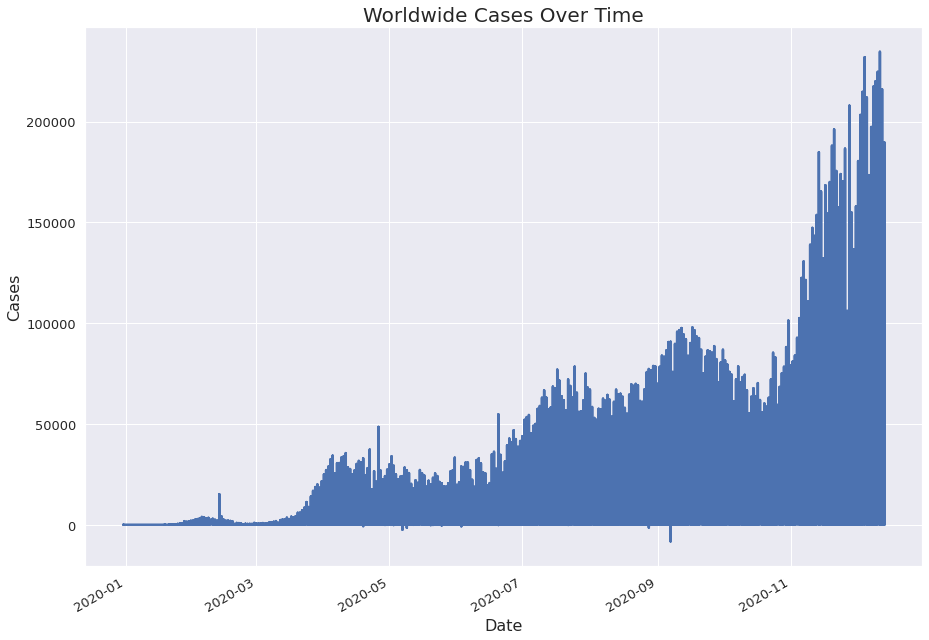

In [24]:
world_daily = covid19_dfA.set_index('dateRep')
sns.set_color_codes("colorblind")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['cases'].plot(linewidth = 2.5)


plt.title('Worldwide Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

In [53]:
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.lines import Line2D

px.bar(covid19_dfA, x = 'countriesAndTerritories', y='cases', color='countriesAndTerritories',title='COVID-19 Cases by Country', log_y = True)

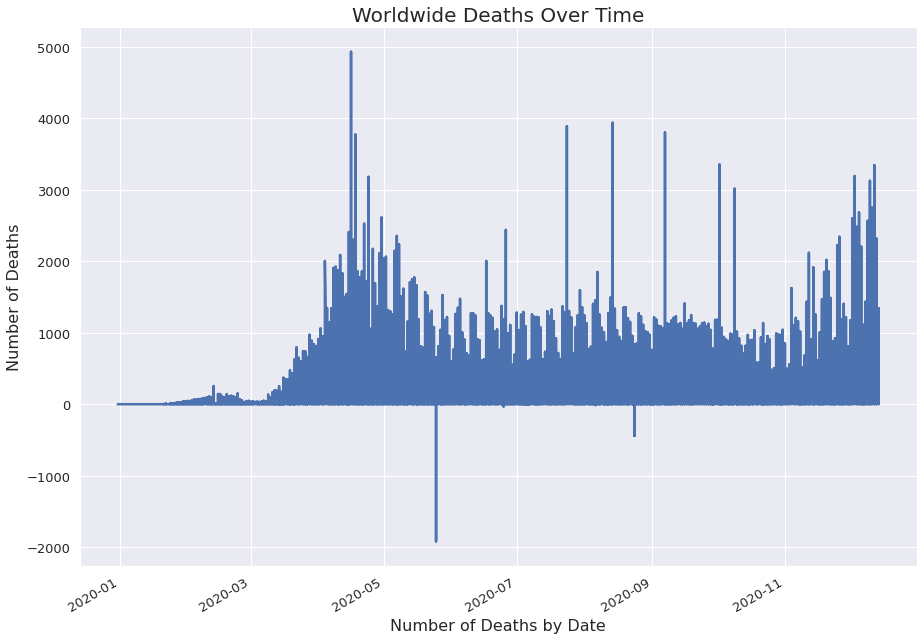

In [25]:
sns.set(rc={'figure.figsize':(15,11)})
world_daily['deaths'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

In [44]:
px.bar(covid19_dfA, x = 'countriesAndTerritories', y='deaths', color='countriesAndTerritories',title='COVID-19 Deaths by Country', log_y = True)

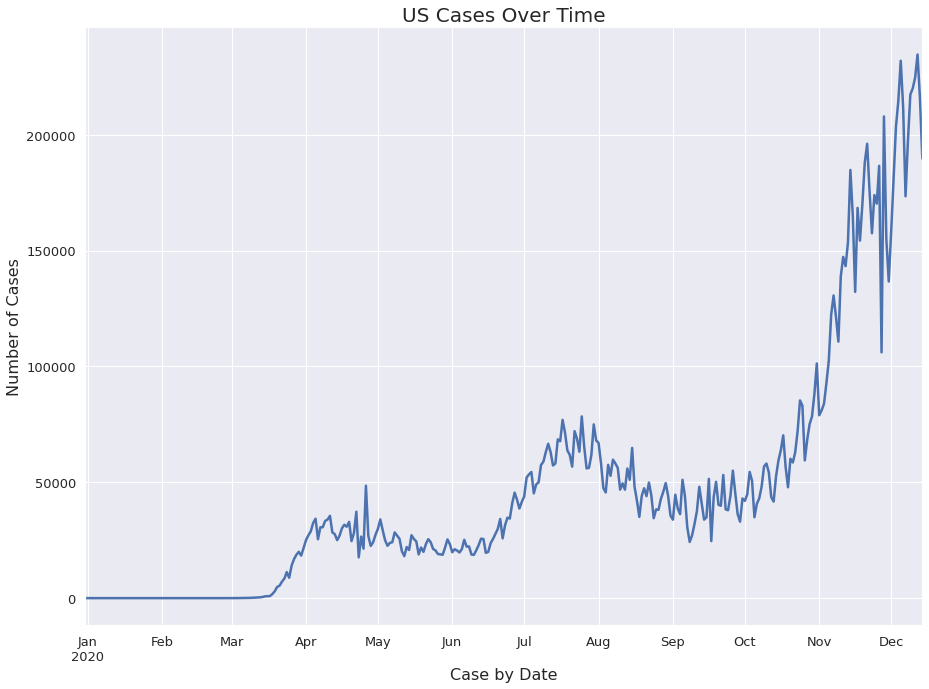

In [26]:
UScovid19_df = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('dateRep')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cases'].plot(linewidth = 2.5)

plt.title('US Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

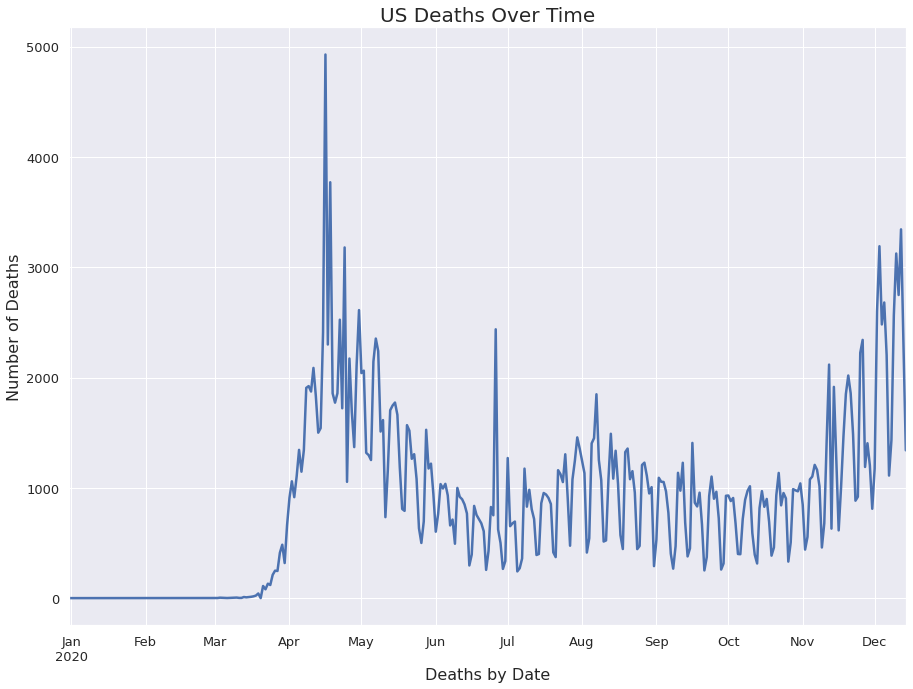

In [27]:
UScovid19_df = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('dateRep')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['deaths'].plot(linewidth = 2.5)

plt.title('US Deaths Over Time', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

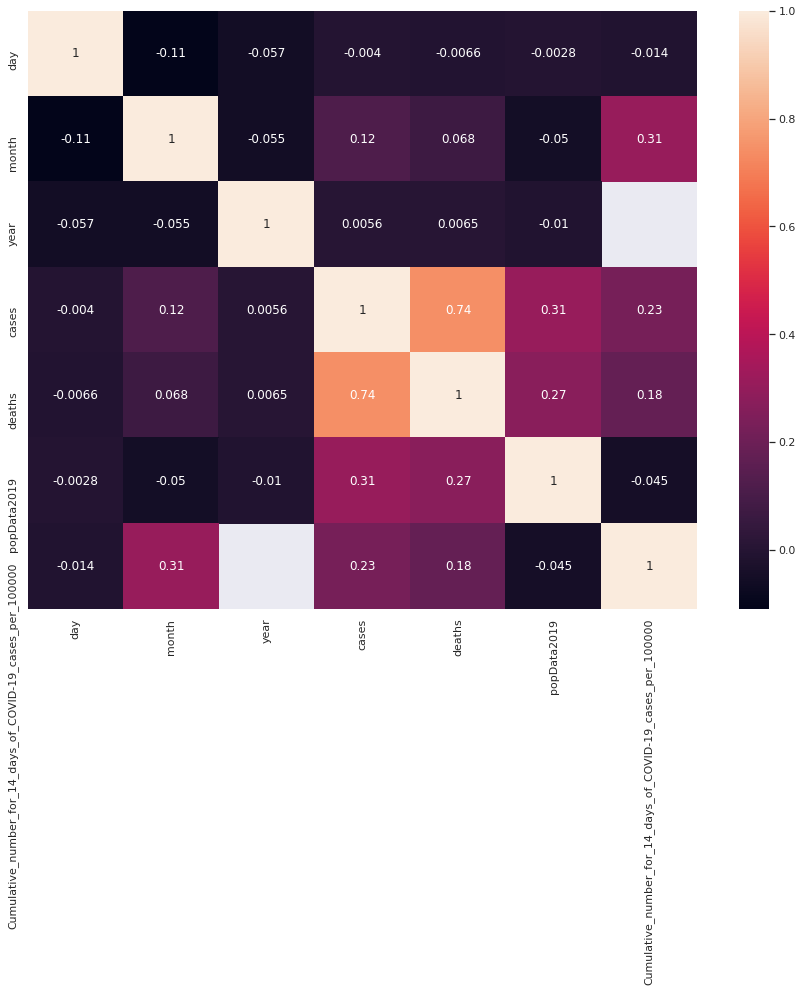

In [28]:
#Performing correlation test on variables to find potential relationships.
sns.heatmap(covid19_dfA.corr(),annot=True)


In [29]:
#Grouping the records by country. Results show that some records may be missing. 
countryd = covid19_dfA.groupby(['countriesAndTerritories']).count().reset_index()
countryd[200:230]

,countriesAndTerritories,dateRep,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
200,United_Kingdom,350,350,350,350,350,350,350,350,350,350,337
201,United_Republic_of_Tanzania,273,273,273,273,273,273,273,273,273,273,260
202,United_States_Virgin_Islands,265,265,265,265,265,265,265,265,265,265,252
203,United_States_of_America,350,350,350,350,350,350,350,350,350,350,337
204,Uruguay,275,275,275,275,275,275,275,275,275,275,262
205,Uzbekistan,274,274,274,274,274,274,274,274,274,274,261
206,Vanuatu,34,34,34,34,34,34,34,34,34,34,21
207,Venezuela,274,274,274,274,274,274,274,274,274,274,261
208,Vietnam,346,346,346,346,346,346,346,346,346,346,333
209,Wallis_and_Futuna,59,59,59,59,59,59,59,0,0,59,0


In [30]:
#seeing if there are other countries with the same records compared to the US
countryd.loc[countryd['countriesAndTerritories'] == 'United_States_of_America']

,countriesAndTerritories,dateRep,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
203,United_States_of_America,350,350,350,350,350,350,350,350,350,350,337


In [48]:
#digging into the data to create a sub df for the US. 
dfus = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].copy().sort_values(by='dateRep').reset_index().drop(columns=['index'])

#adding additional attributes to show the cumulative number of cases and deaths. Also to get the fatality rate, I want to add in deaths / cases using the cumulative values.
dfus['usCumulativeC'] = dfus['cases'].cumsum(axis = 0)
dfus['usCumulativeD'] = dfus['deaths'].cumsum(axis = 0)
dfus['usCumulativeFR'] = dfus['deaths'].cumsum(axis = 0) / dfus['cases'].cumsum(axis = 0)

dfus[60:70]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,usCumulativeC,usCumulativeD,usCumulativeFR
60,2020-02-29,29,2,2020,6,0,United_States_of_America,US,USA,329064917.0,America,0.015498,66,0,0.000000
61,2020-03-01,1,3,2020,3,1,United_States_of_America,US,USA,329064917.0,America,0.016410,69,1,0.014493
62,2020-03-02,2,3,2020,20,1,United_States_of_America,US,USA,329064917.0,America,0.022488,89,2,0.022472
63,2020-03-03,3,3,2020,14,4,United_States_of_America,US,USA,329064917.0,America,0.026742,103,6,0.058252
64,2020-03-04,4,3,2020,22,3,United_States_of_America,US,USA,329064917.0,America,0.033428,125,9,0.072000
65,2020-03-05,5,3,2020,34,2,United_States_of_America,US,USA,329064917.0,America,0.043760,159,11,0.069182
66,2020-03-06,6,3,2020,74,1,United_States_of_America,US,USA,329064917.0,America,0.065944,233,12,0.051502
67,2020-03-07,7,3,2020,105,2,United_States_of_America,US,USA,329064917.0,America,0.092079,338,14,0.041420
68,2020-03-08,8,3,2020,95,3,United_States_of_America,US,USA,329064917.0,America,0.120949,433,17,0.039261
69,2020-03-09,9,3,2020,121,4,United_States_of_America,US,USA,329064917.0,America,0.157720,554,21,0.037906


In [51]:
#creating sub df for Mexico to compare with the US
dfmex=covid19_dfA[covid19_dfA["countriesAndTerritories"] == "Mexico"].copy().sort_values(by='dateRep').reset_index().drop(columns=['index'])

#adding cumulative cases as an attribute
dfmex['mexCumulativeC'] = dfmex['cases'].cumsum(axis = 0)
dfmex['mexCumulativeD'] = dfmex['deaths'].cumsum(axis = 0)
dfmex['mexCumulativeFR'] = dfmex['deaths'].cumsum(axis = 0) / dfus['cases'].cumsum(axis = 0)

dfmex[60:70]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,mexCumulativeC,mexCumulativeD,mexCumulativeFR
60,2020-02-29,29,2,2020,3,0,Mexico,MX,MEX,127575529.0,America,0.008622,14,0,0.0
61,2020-03-01,1,3,2020,1,0,Mexico,MX,MEX,127575529.0,America,0.009406,15,0,0.0
62,2020-03-02,2,3,2020,0,0,Mexico,MX,MEX,127575529.0,America,0.009406,15,0,0.0
63,2020-03-03,3,3,2020,1,0,Mexico,MX,MEX,127575529.0,America,0.010190,16,0,0.0
64,2020-03-04,4,3,2020,3,0,Mexico,MX,MEX,127575529.0,America,0.012542,19,0,0.0
65,2020-03-05,5,3,2020,3,0,Mexico,MX,MEX,127575529.0,America,0.014893,22,0,0.0
66,2020-03-06,6,3,2020,2,0,Mexico,MX,MEX,127575529.0,America,0.016461,24,0,0.0
67,2020-03-07,7,3,2020,0,0,Mexico,MX,MEX,127575529.0,America,0.016461,24,0,0.0
68,2020-03-08,8,3,2020,1,0,Mexico,MX,MEX,127575529.0,America,0.016461,25,0,0.0
69,2020-03-09,9,3,2020,4,0,Mexico,MX,MEX,127575529.0,America,0.019596,29,0,0.0


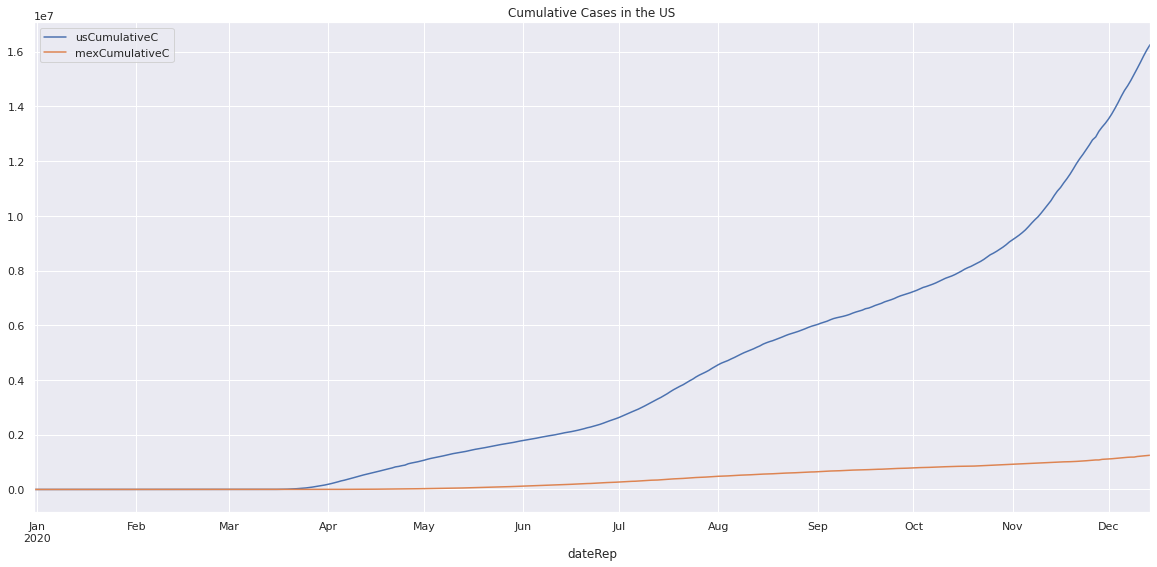

In [72]:
#using graphs to visually compare the two countries

ax2 = dfus.plot(x = 'dateRep', y='usCumulativeC', figsize=(20,9), title='Cumulative Cases in the US')
dfmex.plot(x = 'dateRep', y='mexCumulativeC', figsize=(20,9), ax=ax2)

In [74]:
#I would like to explore the ratio of deaths per cases across different countries, starting with the US. Therefore, a new attribute is formed to capture this. 
dfus['usfatalityratio'] = (dfus['deaths']/dfus['cases']).fillna(0)
dfus[60:70]


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,usCumulativeC,usCumulativeD,usCumulativeFR,usfatalityratio
60,2020-02-29,29,2,2020,6,0,United_States_of_America,US,USA,329064917.0,America,0.015498,66,0,0.000000,0.000000
61,2020-03-01,1,3,2020,3,1,United_States_of_America,US,USA,329064917.0,America,0.016410,69,1,0.014493,0.333333
62,2020-03-02,2,3,2020,20,1,United_States_of_America,US,USA,329064917.0,America,0.022488,89,2,0.022472,0.050000
63,2020-03-03,3,3,2020,14,4,United_States_of_America,US,USA,329064917.0,America,0.026742,103,6,0.058252,0.285714
64,2020-03-04,4,3,2020,22,3,United_States_of_America,US,USA,329064917.0,America,0.033428,125,9,0.072000,0.136364
65,2020-03-05,5,3,2020,34,2,United_States_of_America,US,USA,329064917.0,America,0.043760,159,11,0.069182,0.058824
66,2020-03-06,6,3,2020,74,1,United_States_of_America,US,USA,329064917.0,America,0.065944,233,12,0.051502,0.013514
67,2020-03-07,7,3,2020,105,2,United_States_of_America,US,USA,329064917.0,America,0.092079,338,14,0.041420,0.019048
68,2020-03-08,8,3,2020,95,3,United_States_of_America,US,USA,329064917.0,America,0.120949,433,17,0.039261,0.031579
69,2020-03-09,9,3,2020,121,4,United_States_of_America,US,USA,329064917.0,America,0.157720,554,21,0.037906,0.033058


In [75]:
dfmex['mexfatalityratio'] = (dfmex['deaths']/dfmex['cases']).fillna(0)
dfmex[60:70]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,mexCumulativeC,mexCumulativeD,mexCumulativeFR,fatalityratio,mexfatalityratio
60,2020-02-29,29,2,2020,3,0,Mexico,MX,MEX,127575529.0,America,0.008622,14,0,0.0,0.0,0.0
61,2020-03-01,1,3,2020,1,0,Mexico,MX,MEX,127575529.0,America,0.009406,15,0,0.0,0.0,0.0
62,2020-03-02,2,3,2020,0,0,Mexico,MX,MEX,127575529.0,America,0.009406,15,0,0.0,0.0,0.0
63,2020-03-03,3,3,2020,1,0,Mexico,MX,MEX,127575529.0,America,0.010190,16,0,0.0,0.0,0.0
64,2020-03-04,4,3,2020,3,0,Mexico,MX,MEX,127575529.0,America,0.012542,19,0,0.0,0.0,0.0
65,2020-03-05,5,3,2020,3,0,Mexico,MX,MEX,127575529.0,America,0.014893,22,0,0.0,0.0,0.0
66,2020-03-06,6,3,2020,2,0,Mexico,MX,MEX,127575529.0,America,0.016461,24,0,0.0,0.0,0.0
67,2020-03-07,7,3,2020,0,0,Mexico,MX,MEX,127575529.0,America,0.016461,24,0,0.0,0.0,0.0
68,2020-03-08,8,3,2020,1,0,Mexico,MX,MEX,127575529.0,America,0.016461,25,0,0.0,0.0,0.0
69,2020-03-09,9,3,2020,4,0,Mexico,MX,MEX,127575529.0,America,0.019596,29,0,0.0,0.0,0.0


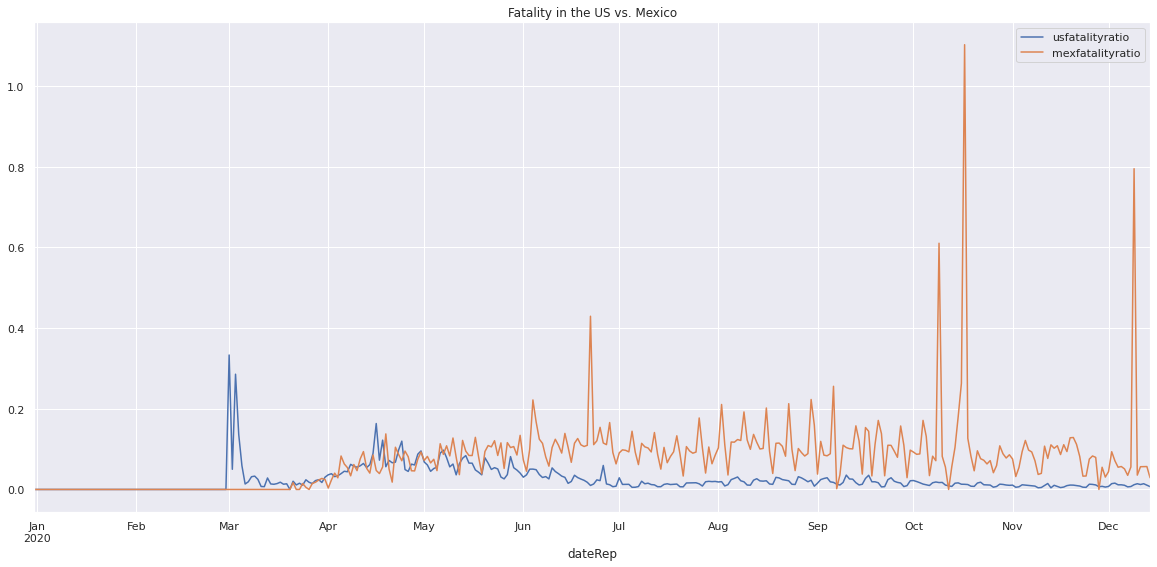

In [77]:
#using graphs to visually compare the two country fatality rate

ax5 = dfus.plot(x = 'dateRep', y='usfatalityratio', figsize=(20,9), title='Fatality in the US vs. Mexico')
dfmex.plot(x = 'dateRep', y='mexfatalityratio', figsize=(20,9), ax=ax5)

In [78]:
#creating sub df for Syria to compare with the US
dfsy=covid19_dfA[covid19_dfA["countriesAndTerritories"] == "Syria"].copy().sort_values(by='dateRep').reset_index().drop(columns=['index'])

#adding cumulative cases as an attribute
dfsy['syCumulativeC'] = dfsy['cases'].cumsum(axis = 0)
dfsy['syCumulativeD'] = dfsy['deaths'].cumsum(axis = 0)
dfsy['syCumulativeFR'] = dfsy['deaths'].cumsum(axis = 0) / dfsy['cases'].cumsum(axis = 0)

dfsy[60:70]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,syCumulativeC,syCumulativeD,syCumulativeFR
60,2020-05-22,22,5,2020,0,0,Syria,SY,SYR,17070132.0,Asia,0.076156,58,3,0.051724
61,2020-05-23,23,5,2020,1,1,Syria,SY,SYR,17070132.0,Asia,0.070298,59,4,0.067797
62,2020-05-24,24,5,2020,11,0,Syria,SY,SYR,17070132.0,Asia,0.134738,70,4,0.057143
63,2020-05-25,25,5,2020,16,0,Syria,SY,SYR,17070132.0,Asia,0.228469,86,4,0.046512
64,2020-05-26,26,5,2020,20,0,Syria,SY,SYR,17070132.0,Asia,0.345633,106,4,0.037736
65,2020-05-27,27,5,2020,15,0,Syria,SY,SYR,17070132.0,Asia,0.433506,121,4,0.033058
66,2020-05-28,28,5,2020,0,0,Syria,SY,SYR,17070132.0,Asia,0.427648,121,4,0.033058
67,2020-05-29,29,5,2020,0,0,Syria,SY,SYR,17070132.0,Asia,0.427648,121,4,0.033058
68,2020-05-30,30,5,2020,1,0,Syria,SY,SYR,17070132.0,Asia,0.421789,122,4,0.032787
69,2020-05-31,31,5,2020,0,0,Syria,SY,SYR,17070132.0,Asia,0.415931,122,4,0.032787


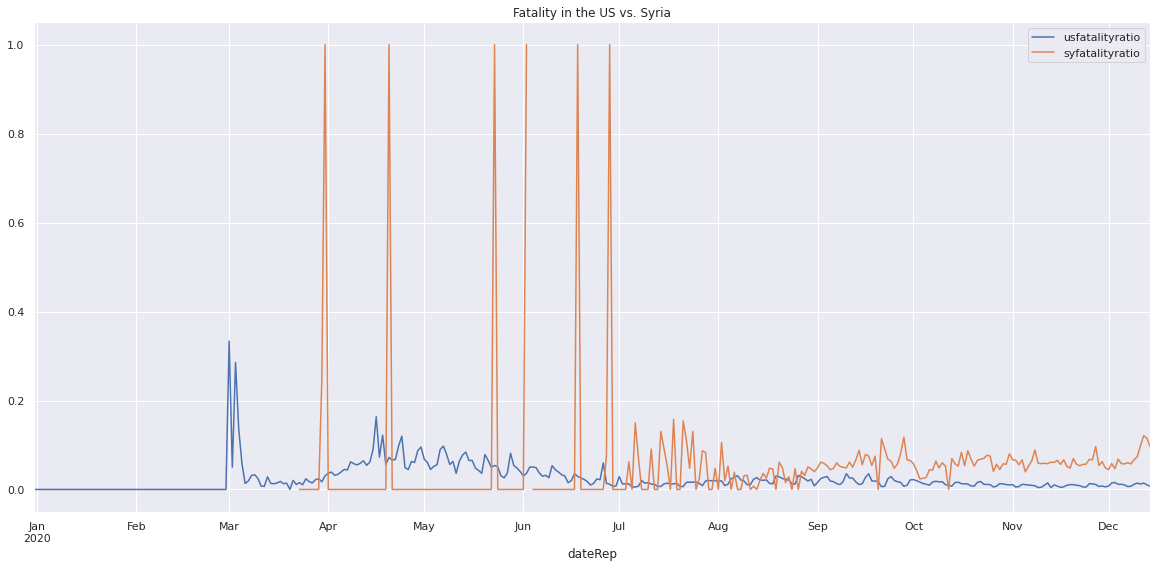

In [80]:
#using graphs to visually compare the two countries

dfsy['syfatalityratio'] = (dfsy['deaths']/dfsy['cases']).fillna(0)

ax6 = dfus.plot(x = 'dateRep', y='usfatalityratio', figsize=(20,9), title='Fatality in the US vs. Syria')
dfsy.plot(x = 'dateRep', y='syfatalityratio', figsize=(20,9), ax=ax6)

#### Data Scaling & Comparisons






In [83]:
#reshape to perform scaling, using cumulative cases as the variable to scale
X = dfus['usCumulativeC'].values.reshape(-1,1)
Y = dfmex['mexCumulativeC'].values.reshape(-1,1)
Z = dfsy['syCumulativeC'].values.reshape(-1,1)

In [84]:
#standard scaling and min max scaling
#first call on the methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

dfus['usStandard'] = StandardScaler().fit_transform(X)
dfus['usMinMax'] = MinMaxScaler().fit_transform(X)

dfmex['mexStandard'] = StandardScaler().fit_transform(Y)
dfmex['mexMinMax'] = MinMaxScaler().fit_transform(Y)

dfsy['syStandard'] = StandardScaler().fit_transform(Z)
dfsy['syMinMax'] = MinMaxScaler().fit_transform(Z)

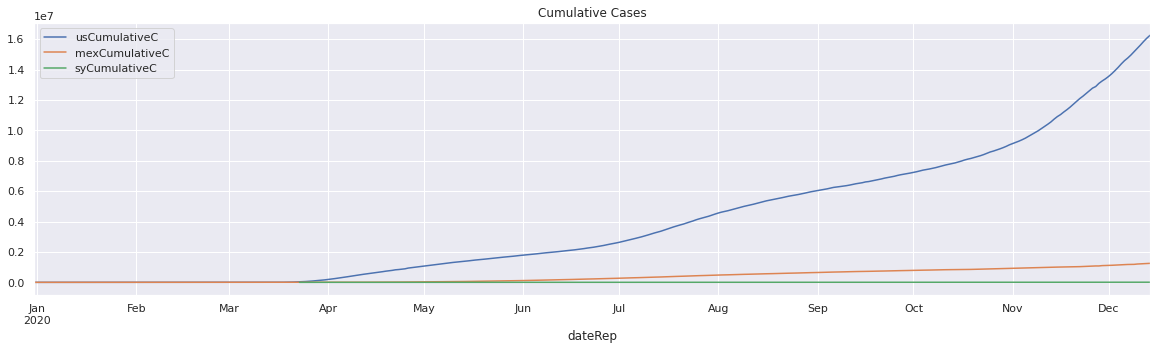

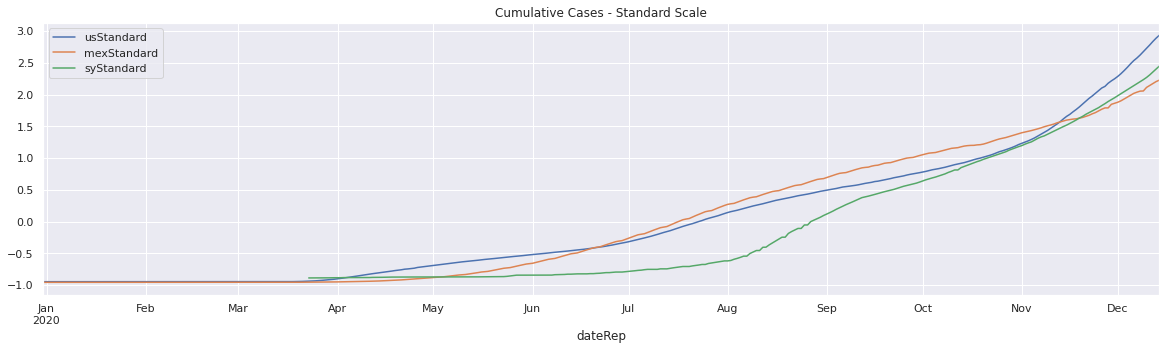

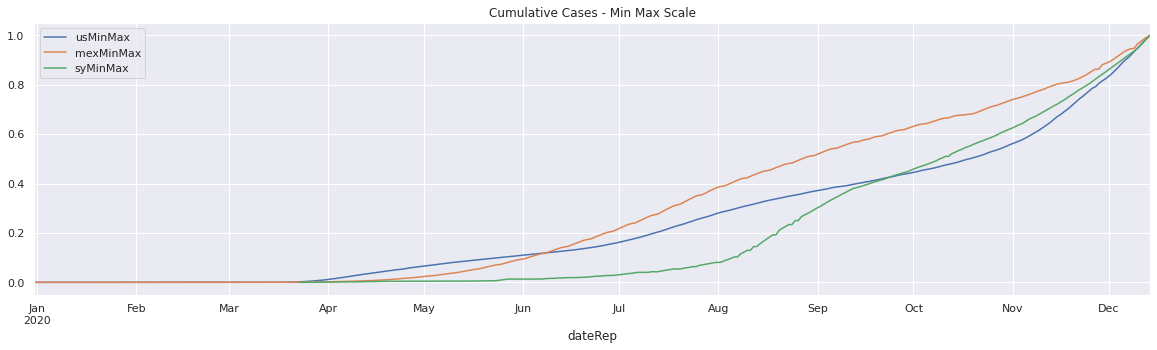

In [87]:
#plotting the cumulative case count, and two scales for US, Mexico, and Syria

sns.set(rc={'figure.figsize':(20,5)})

ax7 = dfus.plot(x='dateRep', y='usCumulativeC', title='Cumulative Cases');
dfmex.plot(x='dateRep', y='mexCumulativeC', title='Cumulative Cases', ax=ax7);
dfsy.plot(x='dateRep', y='syCumulativeC', title='Cumulative Cases', ax=ax7);

ax8 = dfus.plot(x='dateRep', y='usStandard', title = 'Cumulative Cases - Standard Scale');
dfmex.plot(x='dateRep', y='mexStandard', title='Cumulative Cases - Standard Scale', ax=ax8);
dfsy.plot(x='dateRep', y='syStandard', title='Cumulative Cases - Standard Scale', ax=ax8);

ax9 = dfus.plot(x='dateRep', y='usMinMax', title = 'Cumulative Cases - Min Max Scale');
dfmex.plot(x='dateRep', y='mexMinMax', title='Cumulative Cases - Min Max Scale', ax=ax9);
dfsy.plot(x='dateRep', y='syMinMax', title='Cumulative Cases - Min Max Scale', ax=ax9);



FINDINGS/ANALYSIS:



Refer to Report for findings and analysis. 